In [1]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


In [2]:
df = pd.read_csv('heart.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


# Visualizations

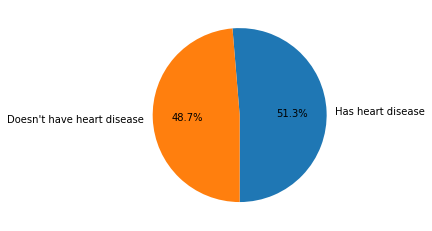

In [20]:
labels = "Has heart disease", "Doesn't have heart disease"

fig1, ax1 = plt.subplots()
ax1.pie(df.target.value_counts(), labels=labels, autopct='%1.1f%%', startangle=270)
plt.show()

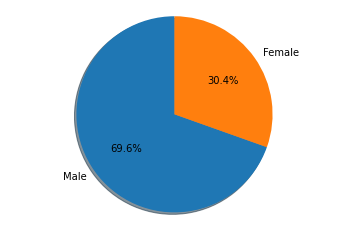

In [4]:
labels = 'Male', 'Female'

fig1, ax1 = plt.subplots()
ax1.pie(df.sex.value_counts(), labels=labels, autopct='%1.1f%%', startangle=270))
plt.show()

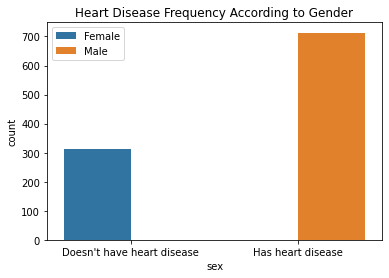

In [28]:
fig = sns.countplot(x='sex',data = df, hue = 'sex')
fig.set_xticklabels(labels=["Doesn't have heart disease", 'Has heart disease'], rotation=0)
plt.title("Heart Disease Frequency According to Gender");

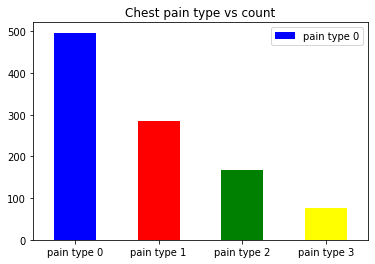

In [23]:
fig = df.cp.value_counts().plot(kind = 'bar', color = ['blue', 'red', 'green', 'yellow'])
fig.set_xticklabels(labels=['pain type 0', 'pain type 1', 'pain type 2', 'pain type 3'], rotation=0)

plt.title('Chest pain type vs count');

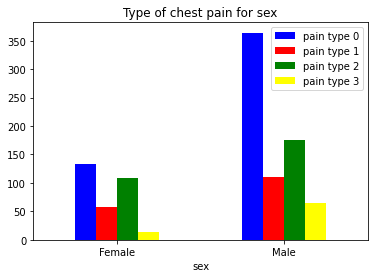

In [7]:
fig = pd.crosstab(df.sex, df.cp).plot(kind = 'bar', color = ['blue', 'red', 'green', 'yellow'])
plt.title('Type of chest pain for sex')
fig.set_xticklabels(labels=['Female', 'Male'], rotation=0)
plt.legend(['pain type 0', 'pain type 1', 'pain type 2', 'pain type 3']);

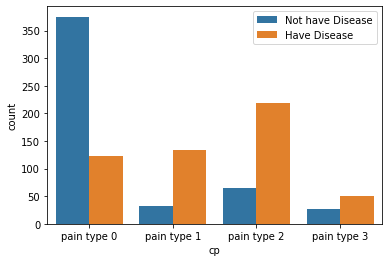

In [8]:
fig = sns.countplot(x = 'Chest Pain', data = df, hue = 'target')
fig.set_xticklabels(labels=['pain type 0', 'pain type 1', 'pain type 2', 'pain type 3'], rotation=0)
plt.legend(['Not have Disease', 'Have Disease']);

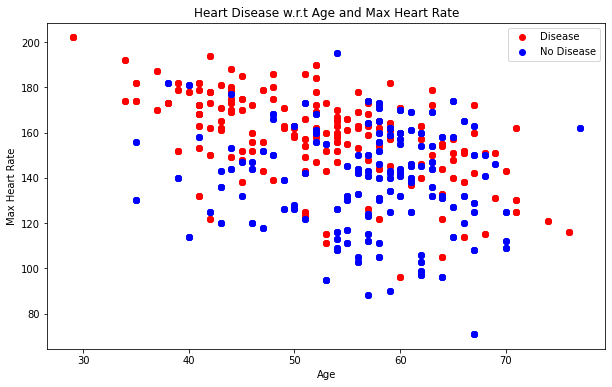

In [9]:
plt.figure(figsize=(10,6))

plt.scatter(df.age[df.target==1], df.thalach[df.target==1], c="red")

plt.scatter(df.age[df.target==0], df.thalach[df.target==0], c="blue")

plt.title("Heart Disease w.r.t Age and Max Heart Rate")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Max Heart Rate");

# KNN

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report

x = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 31)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
knn_predicted = knn.predict(x_test)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')

Accuracy of K-NeighborsClassifier: 85.06493506493507 



# Decision Tree

In [11]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(x_train, y_train)
dt_predicted = dt.predict(x_test)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')

Accuracy of DecisionTreeClassifier: 94.15584415584416 

